# Brief overview of probability and random variables

This function adjusts `matplotlib` settings for a uniform feel in the textbook. Note that with `usetex=True`, fonts are rendered with LaTeX.  This may result in an error if LaTeX is not installed on your system. In that case, you can set usetex to False.

In [6]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

## Probability axioms

Given an event $A$, such as the outcome of a coin toss, we assign it a real number $p(A)$, called the probability of $A$. Note that $p(A)$ could also correspond to a probability that a value of $x$ falls in a $dx$ wide interval around $x$. To qualify as a probability, $p(A)$ must satisfy three Kolmogorov axioms:

1. $p(A) \geq 0$ for each $A$.
2. $p(\Omega) = 1$, where $\Omega$ is a set of all possible outcomes.
3. If $A_1$, $A_2$, . . . are disjoint events, then $p (\bigcup^{\infty}_{i=1}A_i) = \sum_{i=1}^{\infty}p(A_i)$ where $\bigcup$ stands for “union.”

Several useful rules can be derived as a consequence of these axioms.

**Sum rule:**  The probability that the union of two events, A and B, will happen is given by,

$$p(A \cup B) = p(A) + p(B) - p(A \cap B)$$


which is the sum of A and B's respective probabilities minus the probability that both A and B will happen. The union of two events is the probability that *either* event occurs. The $\cap$ in the equation stands for "intersection", and subtracting the last term, $p(A \cap B)$, avoids double counting the places that A and B overlap. In the figure below, we show this graphically.

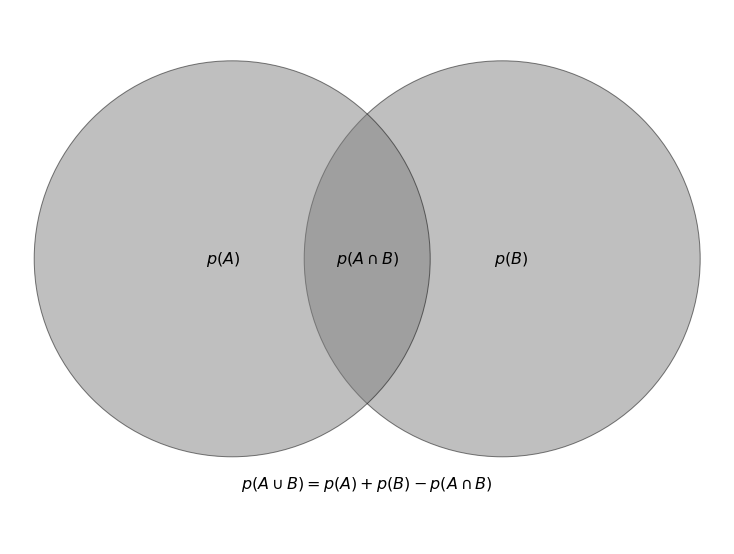

In [9]:
from matplotlib import pyplot as plt

# create plot
fig = plt.figure(figsize=(10, 7.5), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

# draw intersecting circles
ax.add_patch(plt.Circle((1.5, 0.2), 2.2, fc='gray', ec='black', alpha=0.5))
ax.add_patch(plt.Circle((-1.5, 0.2), 2.2, fc='gray', ec='black', alpha=0.5))

# add text
text_kwargs = dict(ha='center', va='center', fontsize=16)
ax.text(-1.6, 0.2, "$p(A)$", **text_kwargs)
ax.text(1.6, 0.2, "$p(B)$", **text_kwargs)
ax.text(0.0, 0.2, "$p(A \cap B)$", **text_kwargs)
ax.text(0, -2.3, "$p(A \cup B) = p(A) + p(B) - p(A \cap B)$", **text_kwargs)

ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)

plt.show()

**Rule of complementary events**: The probability of an event happening plus the probability of it not happening is equal to 1 
$$p(A) + p(\overline{A}) = 1$$

**Rule of multiplication**: The probability that both events A and B occur is equal to the probability that event B occurs times the probability that event A occurs given that B has occurred. Switching A and B yields and equivalent statement.

$$ p(A \cap B) = p(A|B)p(B) = p(B|A)p(A) $$

In the equation above, "|" is pronounced "given" and p(A|B) is the probability of event A occurring given that B has occurred.

**The law of total probability**: if events $B_i, i=1,...,N$ are disjoint and their union is the set of all possible outcomes, then

$$p(A) = \sum_i p(A|\cap B_i) = \sum_i p(A|B_i)p(B_i)$$

Conditional probabilities also satisfy the law of total probability. Assuming that an event C is not mutually exclusive with $A$ or any of $B_i$,

$$    p(A|C) = \sum\limits_{i}p(A|C \cap B_i)p(B_i|C)  $$

## Random variables

A random, or stochastic, variable is, roughly speaking, a variable whose value results from the measurement of a quantity that is subject to random variations. Unlike normal mathematical variables, a random variable can take on a set of possible different values, each with an associated probability.

There are two main types of random variables: discrete and continuous.
* The outcomes of **discrete** random variables form a **countable set.** 
* The outcomes of **continuous** random variables **usually map on to the real number set** (though one can define mapping to the complex plane, or use matrices instead of real numbers, etc.). 

The function which ascribes a probability value to each outcome of the random variable is the **probability density function (pdf).**

**Independent identically distributed (iid)** random variables are drawn from the same distribution and are independent. Two random variables, x and y, are independent if and only if

$$p(x,y) = p(x)p(y)$$

for all values of x and y. In other words, the knowledge of the value of x tells us nothing about the value of y.

## Conditional probability and Bayes’ rule

When two continuous random variables are not independent, then

$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$ 

The *marginal probability function* is defined as

$$ p(x) = \int p(x,y)\:dy $$

and analogously for $p(y)$. Note that complete knowledge of the conditional pdf $p(y|x)$, and the marginal probability $p(x)$, is sufficient to fully reconstruct $p(x,y)$ (the same is true with x and y reversed).


Combining the two equations above, we get a continuous version of the law of total probability,

$$p(x) = \int p(x|y)\: p(y)\: dy $$

In the figure below, we will show an example of a two-dimensional probability distribution together with corresponding marginal and conditional probability distributions. First we will define a random 2D distribution, generate the data, and compute the normalized 2D histogram.

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y)dy}$$

$$p(y_j|x) = \frac{p(x|y_j)p(y_j)}{p(x)} = \frac{p(x|y_j)p(y_j)}{\sum_{j=1}^M p(x|y_j)p(y_j)} $$

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter

def banana_distribution(N=10000):
    """This generates random points in a banana shape"""
    # create a truncated normal distribution
    theta = np.random.normal(0, np.pi / 8, 10000)
    theta[theta >= np.pi / 4] /= 2
    theta[theta <= -np.pi / 4] /= 2
    # define the curve parametrically
    r = np.sqrt(1. / abs(np.cos(theta) ** 2 - np.sin(theta) ** 2))
    r += np.random.normal(0, 0.08, size=10000)
    x = r * np.cos(theta + np.pi / 4)
    y = r * np.sin(theta + np.pi / 4)
    return (x, y)

# Generate the data and compute the normalized 2D histogram
np.random.seed(0)
x, y = banana_distribution(10000)

Ngrid = 41
grid = np.linspace(0, 2, Ngrid + 1)

H, xbins, ybins = np.histogram2d(x, y, grid)
H /= np.sum(H)

Next, we'll plot the results.

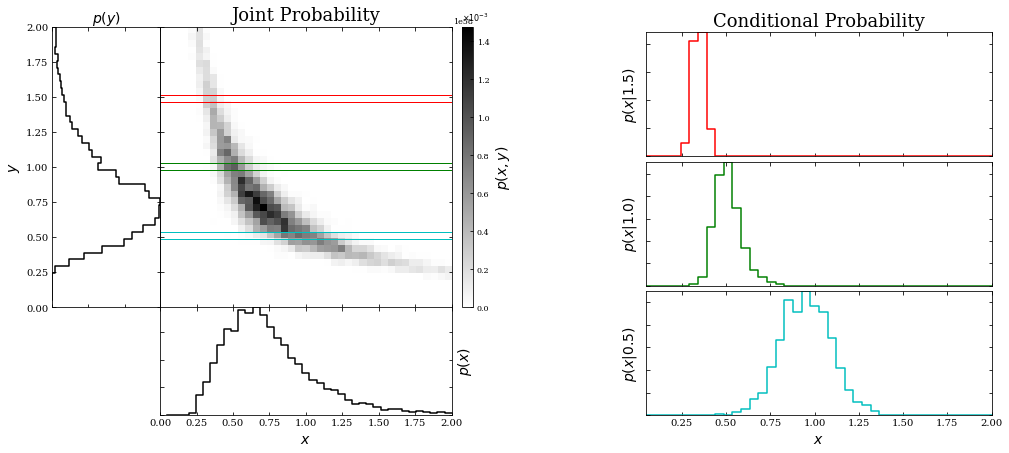

In [35]:
# plot the result
fig = plt.figure(figsize=(15, 7.5))

# define axes
ax_Pxy = plt.axes((0.2, 0.34, 0.27, 0.52))
ax_Px = plt.axes((0.2, 0.14, 0.27, 0.2))
ax_Py = plt.axes((0.1, 0.34, 0.1, 0.52))
ax_cb = plt.axes((0.48, 0.34, 0.01, 0.52))
ax_Px_y = [plt.axes((0.65, 0.62, 0.32, 0.23)),
           plt.axes((0.65, 0.38, 0.32, 0.23)),
           plt.axes((0.65, 0.14, 0.32, 0.23))]

# set axis label formatters
ax_Px_y[0].xaxis.set_major_formatter(NullFormatter())
ax_Px_y[1].xaxis.set_major_formatter(NullFormatter())

ax_Pxy.xaxis.set_major_formatter(NullFormatter())
ax_Pxy.yaxis.set_major_formatter(NullFormatter())

ax_Px.yaxis.set_major_formatter(NullFormatter())
ax_Py.xaxis.set_major_formatter(NullFormatter())

# draw the joint probability
plt.axes(ax_Pxy)
H *= 1000
plt.imshow(H, interpolation='nearest', origin='lower', aspect='auto',
           extent=[0, 2, 0, 2], cmap=plt.cm.binary)

cb = plt.colorbar(cax=ax_cb)
cb.set_label('$p(x, y)$', fontsize = 14)
plt.text(0, 1.02, r'$\times 10^{-3}$',
         transform=ax_cb.transAxes)

# draw p(x) distribution
ax_Px.plot(xbins[1:], H.sum(0), '-k', drawstyle='steps')

# draw p(y) distribution
ax_Py.plot(H.sum(1), ybins[1:], '-k', drawstyle='steps')

# define axis limits
ax_Pxy.set_xlim(0, 2)
ax_Pxy.set_ylim(0, 2)
ax_Px.set_xlim(0, 2)
ax_Py.set_ylim(0, 2)

# label axes
ax_Pxy.set_xlabel('$x$', fontsize = 14)
ax_Pxy.set_ylabel('$y$', fontsize = 14)
ax_Px.set_xlabel('$x$', fontsize = 14)
ax_Px.set_ylabel('$p(x)$', fontsize = 14)
ax_Px.yaxis.set_label_position('right')
ax_Py.set_ylabel('$y$', fontsize = 14)
ax_Py.set_xlabel('$p(y)$', fontsize = 14)
ax_Py.xaxis.set_label_position('top')

ax_Px.tick_params(axis='both', which='major', labelsize=10)
ax_Py.tick_params(axis='both', which='major', labelsize=10)

# draw marginal probabilities
iy = [3 * Ngrid // 4, Ngrid // 2, Ngrid // 4]
colors = 'rgc'
axis = ax_Pxy.axis()
for i in range(3):
    # overplot range on joint probability
    ax_Pxy.plot([0, 2, 2, 0],
                [ybins[iy[i] + 1], ybins[iy[i] + 1],
                 ybins[iy[i]], ybins[iy[i]]], c=colors[i], lw=1)
    Px_y = H[iy[i]] / H[iy[i]].sum()
    ax_Px_y[i].plot(xbins[1:], Px_y, drawstyle='steps', c=colors[i])
    ax_Px_y[i].yaxis.set_major_formatter(NullFormatter())
    ax_Px_y[i].set_ylabel('$p(x | %.1f)$' % ybins[iy[i]], fontsize = 14)
    ax_Px_y[i].tick_params(axis='both', which='major', labelsize=10)
ax_Pxy.axis(axis)

ax_Px_y[2].set_xlabel('$x$', fontsize = 14)

ax_Pxy.set_title('Joint Probability', fontsize = 18)
ax_Px_y[0].set_title('Conditional Probability', fontsize = 18)

plt.show()